In [1]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# 导入numpy库
import numpy as np 
import xgboost as xgb
from utils import *
import pickle
random.seed(4487)

In [2]:
def RF(trainX, trainY, testX):
    
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'rf__n_estimators': [500, 600, 800]
    }
    
    # Create a pipeline with PCA and RandomForestClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('rf', RandomForestClassifier(random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    rf = GridSearchCV(pipeline, param_grid, cv=10)
    rf.fit(trainX, trainY)

    print("RF Parameter:", rf.best_params_)

    pred = rf.predict(testX)
    prob = rf.predict_proba(testX)[:, 1]
    return pred, prob


def XGBoost(trainX, trainY, testX):
    
    param_grid = {
        'pca__n_components': [11],
        'xgb__learning_rate': logspace(-3, 3, 20),
        'xgb__n_estimators': array([500, 1000])
    }
    # print(paramgrid)

    # Create a pipeline with PCA and XGBoostClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    xgb = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
    xgb.fit(trainX, trainY)
    print("best params:", xgb.best_params_)

    pred = xgb.predict(testX)
    prob = xgb.predict_proba(testX)[:, 1]

    return pred, prob


def KNN(trainX, trainY, testX):
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'knn__n_neighbors': [i for i in range(2, 30)],
        'knn__weights': ['distance', 'uniform'],
        'knn__p': [1, 2]
    }

    # Create a pipeline with PCA and KNeighborsClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ])

    # Use GridSearchCV to find the best parameters
    knn = GridSearchCV(pipeline, param_grid, cv=10)
    knn.fit(trainX, trainY)

    print("knn best parameters: ", knn.best_params_)
    pred = knn.predict(testX)
    prob = knn.predict_proba(testX)[:, 1]
    return pred, prob


def GPC(trainX, trainY, testX):
    kernel_options = [1.0 * RBF(length_scale=10), 1.0 * Matern(length_scale=10)]
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'gpc__kernel': kernel_options,
        'gpc__n_restarts_optimizer': [0, 1, 2]
    }

    # Create a pipeline with PCA and GaussianProcessClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('gpc', GaussianProcessClassifier(random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    gpc = GridSearchCV(pipeline, param_grid, cv=10)
    gpc.fit(trainX, trainY)

    print("GPC best parameters: ", gpc.best_params_)
    pred = gpc.predict(testX)
    prob = gpc.predict_proba(testX)[:, 1]
    return pred, prob

In [3]:
with open('data.pkl', 'rb') as file:
    # 使用pickle的load方法从文件反序列化数据
        data_loaded = pickle.load(file)

# data_loaded现在是一个包含x，y，label的字典
x = data_loaded['x']
y = data_loaded['y']
label = data_loaded['label'] 
#  x, y, label = load_data()
trainX, trainY, testX, testY = train_test_split(x, y)

RF Parameter: {'pca__n_components': 11, 'rf__n_estimators': 800}
0.84251968503937
ROC_AUC : 0.8930534732633683


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


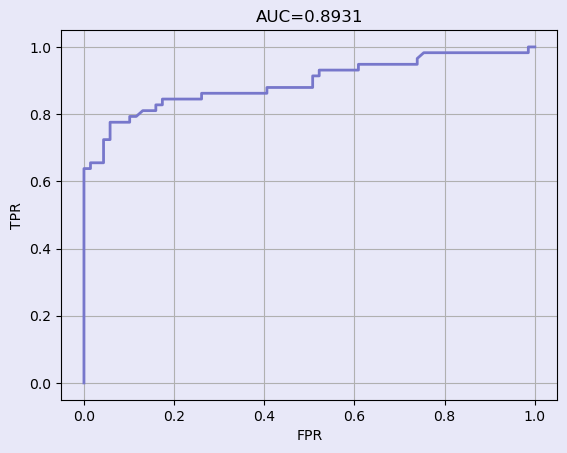

In [4]:
# 0.7687-0.7672
RF_pred, RF_prob = RF(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, RF_pred)
print(acc)
plot_roc(testY, RF_prob)

best params: {'pca__n_components': 11, 'xgb__learning_rate': 0.0379269019073225, 'xgb__n_estimators': 500}
0.84251968503937
ROC_AUC : 0.8840579710144928


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


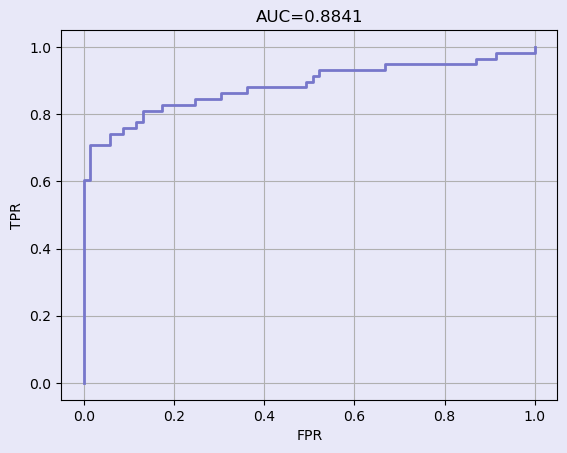

In [5]:
# 0.7741
xgb_pred, xgb_prob = XGBoost(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, xgb_pred)
print(acc)
plot_roc(testY, xgb_prob)

knn best parameters:  {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 11}
0.8110236220472441
ROC_AUC : 0.8930534732633684


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


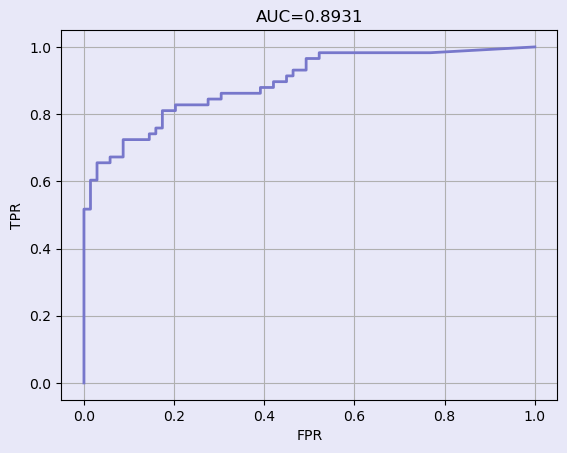

In [6]:
# 0.7631-0.6990
knn_pred, knn_prob = KNN(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, knn_pred)
print(acc)
plot_roc(testY, knn_prob)

GPC best parameters:  {'gpc__kernel': 1**2 * Matern(length_scale=10, nu=1.5), 'gpc__n_restarts_optimizer': 0, 'pca__n_components': 11}
0.8503937007874016
ROC_AUC : 0.9090454772613693


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


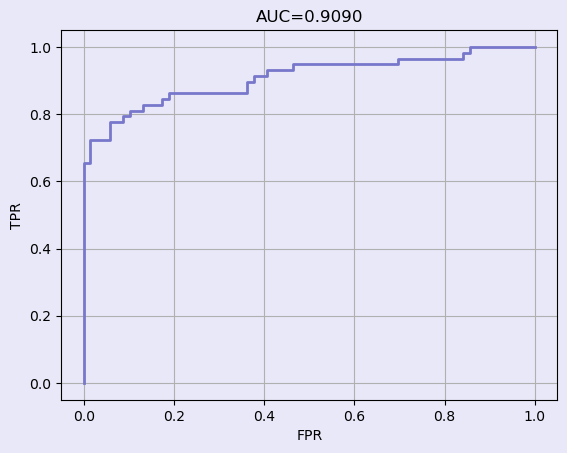

In [7]:
# 0.7879-0.8017
gpc_pred, gpc_prob = GPC(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, gpc_pred)
print(acc)
plot_roc(testY, gpc_prob)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from utils import *
import pickle
def DT(trainX, trainY, testX):
    param_grid = {
        'pca__n_components': [2, 5, 10], # Number of components for PCA
        'dt__max_depth': [None, 50, 100, 500],
        'dt__min_samples_split': [20, 50, 10],
        'dt__min_samples_leaf': [10, 20, 5]
    }

    # Create a pipeline with PCA and DecisionTreeClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('dt', DecisionTreeClassifier(random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    dt = GridSearchCV(pipeline, param_grid, cv=5)
    dt.fit(trainX, trainY)

    # 打印最优的参数
    print("DT Parameter:", dt.best_params_)

    # 预测测试集
    pred = dt.predict(testX)
    # 对于决策树来说，predict_proba也是可用的
    prob = dt.predict_proba(testX)[:, 1]
    
    return pred, prob

DT Parameter: {'dt__max_depth': None, 'dt__min_samples_leaf': 20, 'dt__min_samples_split': 50, 'pca__n_components': 10}
0.7559055118110236
ROC_AUC : 0.7882308845577212


C:\Users\43492\Desktop\warehouse\Project\CS5483-Project2\Code\visualization\utils.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'k-', lw=2, color='#7777cb')


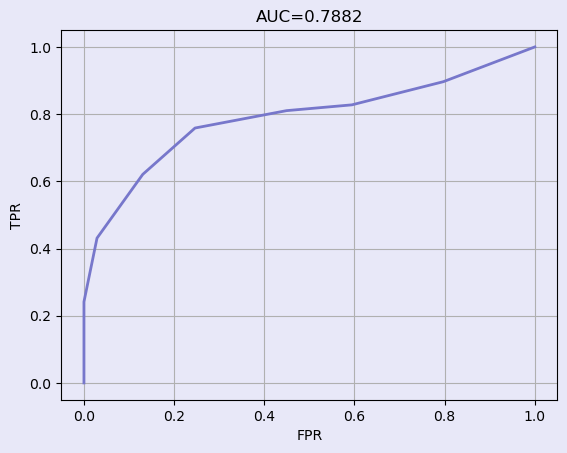

In [9]:
# SVM-linear kernel 0.7507-0.7603-0.6460
DT_pred, DT_prob = DT(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, DT_pred)
print(acc)
plot_roc(testY, DT_prob)